# 🛰️ Sentinel-2 Image Downloader

## 🌟 Sentinel-2 Mission Overview
Sentinel-2, part of the European Space Agency's **Copernicus Programme**, is a constellation of satellites designed for high-resolution Earth observation.

<p style="text-align:left">
    <a href="https://www.esa.int/Applications/Observing_the_Earth/Copernicus/Sentinel-2" target="_blank">
        <img src="https://sentiwiki.copernicus.eu/__attachments/1671710/image-20230517-132224.png?inst-v=c933ac4b-944a-4344-ade1-8006f46193ba" width="400" alt="Graphic">
    </a>
</p>

### 🛰️ Number of Satellites
 As of 2025, **three satellites** are operational:   

- 🚀 **Sentinel-2A** (launched June 23, 2015)  
- 🚀 **Sentinel-2B** (launched March 7, 2017)  
- 🚀 **Sentinel-2C** (launched September 5, 2024)
    
A fourth satellite, **Sentinel-2D**, is planned to replace older units in the future.

📖 For an official overview of the Sentinel-2 mission, including its objectives, satellite specifications, and applications, visit the [ESA Sentinel-2 mission](https://www.esa.int/Applications/Observing_the_Earth/Copernicus/Sentinel-2). 

### 🧭 High Spatial Resolution

Sentinel-2 offers **multi-scale spatial resolution** across its 13 spectral bands: 

- 🔵 **10 m** – Visible (Blue, Green, Red) and Near-Infrared (NIR)
- 🟢 **20 m** – Red-edge and Shortwave Infrared (SWIR)
- 🟣 **60 m** – Atmospheric correction bands (e.g., cirrus, water vapor)

📖 For detailed information about the Sentinel-2 MSI (Multispectral Instrument), including its spectral bands and spatial resolution, visit the [Sentinel-2 MSI Instrument](https://www.earthdata.nasa.gov/data/instruments/sentinel-2-msi).

The band composition allows for detailed mapping of vegetation, urban areas, water bodies, and more:  

- 🌿 Vegetation indices (e.g., NDVI, EVI)
- 💧 Water quality and turbidity
- 🏜️ Soil moisture and mineral content
- 🌫️ Atmospheric correction (e.g., haze, cirrus detection)

### 🔁 Frequent Revisit Intervals

Thanks to its constellation design:
- 🕔 **Each satellite** revisits the same location every **10 days**
- 🕔 **Combined constellation** (2A + 2B + 2C) achieves a **5-day revisit time** at the equator
- 🧊 At higher latitudes, revisit frequency may increases due to orbital overlap.

This high temporal resolution ensures timely data for dynamic monitoring—especially useful in cloud-prone or rapidly changing environments.

### 🌫️ Atmospheric Levels
Sentinel-2 data is available at different processing levels, each offering a distinct degree of radiometric and geometric correction. You can select the desired level based on your specific needs:

- **Level-1C**:  
  🌤️ Top-of-atmosphere reflectance. Includes ortho-rectification and global spatial registration.  
  Ideal for aquatic studies or when raw reflectance is preferred.

- **Level-2A**:  
  🌍 Bottom-of-atmosphere reflectance in cartographic geometry. Includes atmospheric, terrain, and cirrus correction.  
  Best suited for terrestrial applications requiring accurate surface reflectance.

---

## 🛠️ Sentinel-2 Downloader Built with Python
In this notebook, a **versatile Python tool** is developed to automate the retrieval of multiple Sentinel-2 images from the **Copernicus Data Space Ecosystem** 🌍.

### ⚙️ Why Use the this code?
The tool aims to offer flexibility by enabling the selection of different atmospheric correction levels. This simplifies the data acquisition process and ensures that the appropriate imagery is obtained for a wide range of applications.

Some QGIS plugins, like **Sentinel 2 Image Downloader**, offer a simple, no-code interface for downloading satellite imagery. This Python-based workflow was developed to support more specific use cases, particularly where logging, automation, and batch processing are more important:

- **Customisable downloads** tailored to specific project needs  
- **Integration** with broader data processing workflows  
- **Batch processing and automation** for large-scale tasks  
- **Download logging** via CSV for tracking and resuming interrupted sessions  

> ⚠️ **Note:** This workflow is especially useful when working with unstable internet connections. If a download is interrupted, the process can resume from where it left off using the generated CSV file.

Additionally, in cases where comparing different baselines is required (see Section 2.2), this method allows downloading multiple versions of the same image—something that may not be supported by plugin-based tools.

### 🔓 Account Required
⚠️ Before you begin, make sure you have an account with the **Copernicus Data Space Ecosystem**.  
👉 [Click here to register](https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/auth?client_id=cdse-public&response_type=code&scope=openid&redirect_uri=https%3A%2F%2Fdataspace.copernicus.eu%2Faccount%2Fconfirmed%2egree)

### 📃 Code Structure

1. **Notebook Setup**
    - 1.1 Install Libraries
    - 1.2 Import Libraries
    - 1.3 Setup Region of Interest (ROI)
        - 1.3.1 WKT Solution
        - 1.3.2 Shapefile Solution
        - 1.3.3 Latitude/Longitude Solution
        - 1.3.4 Inspect the ROI in Google Map
2. **Functions**
    - 2.1 Generate Access Token (Function)
    - 2.2 Download Image (Function)
3. **Download Procedure**
    - 3.1 Set Download Timeframe
    - 3.2 Sign-In
    - 3.3 Set the Desired Product
    - 3.4 Set Where to Save
    - 3.5 The Show Must Go On :)

## 📖 About this Code

👤 Author: Julian Manning  
📅 Last Updated: **29 October 2025**  
🔗 Connect on [LinkedIn](https://www.linkedin.com/in/julian-manning/)  
🔗 Feel free to check out my [Medium article](https://medium.com/@julian.manning/batch-downloading-of-sentinel-2-imagery-with-python-handling-different-atmospheric-levels-6648b7526d6b) on this topic. 
🔗 This code is saved on my github [Repository](https://github.com/julianManning/SatDataRetriever)


## 🛠️ 1. Environment Setup

This notebook was tested in a **Python 3.12.12** environment.

To ensure compatibility and avoid potential conflicts with your existing Python setup, it's recommended to create a **dedicated virtual environment** specifically for this workflow. This helps isolate dependencies and ensures consistent behavior across different systems.

You can create a new environment using `conda` or `venv`. For example, with conda:

```bash
conda create -n sentinel_env python=3.12.12
conda activate sentinel_env

## ⚙️ 1.1 Install Libraries
- The libraries listed below need to be installed on you machine only once.
- Hence if you're running this code on your machine for the first time, you might need to change these cells from <span style="color:red;">'RAW'</span> to <span style="color:red;">'CODE'</span> and execute the installation commands.
- Once the installation is complete, don't forget to comment them out or convert them to <span style="color:red;">'RAW'</span> again
- You might need to restart kernel after installing these libraries

In [ ]:
!pip install sentinelsat sentinelhub geopandas dea-tools certifi matplotlib ipywidgets datacube odc-geo

## 📦 1.2 Import Libraries

- The DEA-TOOLS github [repository](https://github.com/GeoscienceAustralia/dea-notebooks/tree/develop/Tools)
- The utils file can be downloaded from this github [repository](https://github.com/sentinel-hub/sentinelhub-py)

In [ ]:
%matplotlib inline
import sys # Access system-specific parameters and functions
import os # Interact with the operating system (e.g., file handling)
import requests # To define http request to be make.
import pandas as pd # Convert data received from copernicus API in easier format.
import geopandas as gpd # Convert Pandas dataframe in Geo pandas will allow us to use metadata and geoemtry.
import getpass # Securely handle password prompts
import matplotlib.pyplot as plt # Create static, animated, and interactive visualizations
import time # Work with time-related functions
import certifi # Use Mozilla’s CA Bundle for SSL certificate verification
import ipywidgets as widgets # Used to create interactive widgets in Jupyter notebooks.
import re #Provides support for regular expressions.

from tqdm import tqdm  # Display progress bars for loops and iterable operations
from ipywidgets import VBox, HBox  # Create and arrange interactive widgets in Jupyter notebooks
from IPython.display import display  # Display objects in Jupyter notebooks
from shapely.geometry import shape, Polygon, box  # Create and manipulate geometric shapes
from matplotlib.patches import Patch  # Create custom legend handles in plots
from shapely.geometry import shape  # Convert raw geometry data into Shapely geometry objects
from datetime import date, timedelta  # Work with dates and time intervals
from dea_tools.plotting import rgb, display_map  # Plot RGB images and display interactive maps
from datacube.utils.cog import write_cog  # Write Cloud Optimized GeoTIFFs (COGs)
from datacube.utils import geometry  # Utilities for handling geometric data ## (DeprecationWarning)
from urllib.parse import quote  # Make sure this import is at the top of your scrip

from sentinelhub import (
    CRS,  # Coordinate Reference Systems
    DataCollection,  # Sentinel Hub data collections
    Geometry,  # Geometric shapes and operations
    MimeType,  # MIME types for data formats
    BatchProcessClient,  # Batch processing with Sentinel Hub
    SentinelHubRequest,  # Make requests to Sentinel Hub services
    SHConfig,  # Configuration for Sentinel Hub
    bbox_to_dimensions,  # Convert bounding box to dimensions
    monitor_batch_process_job,  # Monitor the status of batch jobs
)

## 🔍 1.3 Setup Region of Interest (ROI)

There are three solutions available to set the Region of Interest (ROI): WKT, Shapefile, and Latitude/Longitude. Remember, you should use only one of these solutions based on what suits your purpose or is easier for you.

### Solutions:
1. **WKT (Well-Known Text)**: A text markup language for representing vector geometry objects.
2. **Shapefile**: A popular geospatial vector data format for geographic information system (GIS) software.
3. **Latitude/Longitude**: A method to define the ROI using geographical coordinates.

<span style="color:red">**Note**</span>: Only the preferred solution should be active or be in code mode. The other solutions should be set to raw mode to avoid conflicts and ensure clarity in your implementation.

### 🧭 1.3.1 WKT Solution
Save your ROI as KML file and then open it up in this [site](https://geojson.io/) and save it as WKT. Open the file in notepad and copy the polygon details and insert it below:

In [ ]:
# WKT Representation of BBOX of AOI
ROI = "POLYGON ((145.338802892803 -14.9991698106635, 145.338942371856 -14.9810949813835, 145.35753632828 -14.9812297182838, 145.357398408842 -14.9993047175073, 145.338802892803 -14.9991698106635))"

### 🗂️ 1.3.2 Shapefile Solution
Load the shapefile representing the Region of Interest (ROI). If the shapefile contains multiple parts, ensure you select the correct index to accurately represent the desired area.

Converted ROI_SHP from EPSG:32756 to EPSG:4326
Extent of the polygon: POLYGON ((153.0337571469291 -27.52964466483378, 153.0337571469291 -27.255152214844987, 153.3037097043173 -27.255152214844987, 153.3037097043173 -27.52964466483378, 153.0337571469291 -27.52964466483378))


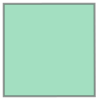

In [2]:
# Better to use absolute python path with / as opposed to \
ROI_SHP = gpd.read_file("/path/to/ROI.shp)
# ROI_SHP = gpd.read_file(r"C:\region_of_interest.shp")
# Get the current EPSG code
current_epsg = ROI_SHP.crs.to_epsg()

# Check if the current EPSG is not equal to 4326 and convert if necessary
if current_epsg != 4326:
    ROI_SHP = ROI_SHP.to_crs(epsg=4326)
    print(f"Converted ROI_SHP from EPSG:{current_epsg} to EPSG:4326")
else:
    print(f"ROI_SHP is already in EPSG:4326")

# Get the bounds of the polygon
minx, miny, maxx, maxy = ROI_SHP.total_bounds

# Format the bounds as a POLYGON string
ROI = f"POLYGON (({minx} {miny}, {minx} {maxy}, {maxx} {maxy}, {maxx} {miny}, {minx} {miny}))"
print(f"Extent of the polygon: {ROI}")

ROI_SHP.geometry[0] #index 0

### 🌐 1.3.3 Latitude/Longitude Solution
Alternatively, you can set the Region of Interest (ROI) using a latitude and longitude range. This method allows for precise geographical targeting by specifying the exact coordinates that define the boundaries of your area of interest. By inputting the minimum and maximum values for both latitude and longitude, you can create a rectangular region that encompasses your desired location. This approach is particularly useful for applications requiring accurate spatial data, such as mapping, geofencing, and location-based services.

📌 As an example (Mud Island, Queensland, Australia):
- Top: -27.303472098208402
- Bottom: -27.372969345995482
- Right: 153.29458767841976
- Left: 153.20652833914747

In [ ]:
# Function to create a bounding box from latitude and longitude range
def create_bounding_box(min_lat, min_lon, max_lat, max_lon):
    return box(min_lon, min_lat, max_lon, max_lat)

# Create widgets for user input with text on top and middle aligned
# Latitudes
min_lat_widget = widgets.Text(value='', layout=widgets.Layout(width='200px'))
max_lat_widget = widgets.Text(value='', layout=widgets.Layout(width='200px'))
min_lat_label = widgets.Label("Min Latitude (Top):", layout=widgets.Layout(width='200px', text_align='center'))
max_lat_label = widgets.Label("Max Latitude (Bottom):", layout=widgets.Layout(width='200px', text_align='center'))
# Longitudes
min_lon_widget = widgets.Text(value='', layout=widgets.Layout(width='200px'))
max_lon_widget = widgets.Text(value='', layout=widgets.Layout(width='200px'))
min_lon_label = widgets.Label("Min Longitude (Left):", layout=widgets.Layout(width='200px', text_align='center'))
max_lon_label = widgets.Label("Max Longitude (Right):", layout=widgets.Layout(width='200px', text_align='center'))

button = widgets.Button(description="Create Bounding Box")

# Arrange the widgets in the desired layout
latitudes_box = VBox([min_lat_label, min_lat_widget], layout=widgets.Layout(align_items='center'))
longitudes_box = HBox([VBox([min_lon_label, min_lon_widget], layout=widgets.Layout(align_items='center', margin='0 50px 0 0')), 
                       VBox([max_lon_label, max_lon_widget], layout=widgets.Layout(align_items='center', margin='0 0 0 50px'))], 
                      layout=widgets.Layout(justify_content='space-between', align_items='center'))
max_lat_box = VBox([max_lat_label, max_lat_widget], layout=widgets.Layout(align_items='center'))
layout_box = VBox([latitudes_box, longitudes_box, max_lat_box], layout=widgets.Layout(align_items='center'))

# Display widgets
display(layout_box, button)

# Function to handle button click
def on_button_click(b):
    min_lat = float(min_lat_widget.value)
    max_lat = float(max_lat_widget.value)
    min_lon = float(min_lon_widget.value)
    max_lon = float(max_lon_widget.value)
    
    # Create the bounding box
    bounding_box = create_bounding_box(min_lat, min_lon, max_lat, max_lon)
    
    # Create a GeoDataFrame with the bounding box
    ROI_SHP = gpd.GeoDataFrame({'geometry': [bounding_box]}, crs="EPSG:4326")
    
    # Output the ROI as a string
    global ROI
    ROI = str(ROI_SHP.geometry[0])
    print(ROI)

# Attach the button click event
button.on_click(on_button_click)

### 🗺️ 1.3.4 Inspect the ROI in Google Map
In this step, you will visually examine the Region of Interest (ROI) using Google Maps. This allows you to verify the location, assess the surrounding environment, and ensure the accuracy of the selected area. This step might be crucial for validating the data and ensuring that the ROI aligns with your research objectives.

In [4]:
# Extract the coordinates from the string
coordinates = re.findall(r"[-+]?\d*\.\d+|\d+", ROI)

# Convert the coordinates to float and pair them as (lon, lat)
coordinates = [(float(coordinates[i]), float(coordinates[i+1])) for i in range(0, len(coordinates), 2)]

# Extract latitudes and longitudes
lats = [coord[1] for coord in coordinates]
lons = [coord[0] for coord in coordinates]

# Find min and max latitudes and longitudes
min_lat = min(lats)
max_lat = max(lats)
min_lon = min(lons)
max_lon = max(lons)

print(f"Min Latitude: {min_lat}")
print(f"Max Latitude: {max_lat}")
print(f"Min Longitude: {min_lon}")
print(f"Max Longitude: {max_lon}")

lat_range = (min_lat,max_lat)
lon_range = (min_lon,  max_lon)

# Display google basemap in the background
# display_map(x, y[, crs, margin, zoom_bias])
# Given a set of x and y coordinates, this function generates an interactive map with a bounded rectangle overlayed on Google Maps imagery.
display_map(x=lon_range, y=lat_range, margin=-0.5, zoom_bias=0)

Min Latitude: -27.52964466483378
Max Latitude: -27.255152214844987
Min Longitude: 153.0337571469291
Max Longitude: 153.3037097043173


# 🛰️ 2. Sentinel-2 Functions

## 🔐 2.1 Generate Access Token (Function)

The `get_keycloak` function is designed to obtain an access token from the Keycloak authentication server using the provided username and password. It constructs a data dictionary with the necessary credentials and client information, then sends a POST request to the Keycloak token endpoint. If the request is successful, the function returns the access token. If the request fails, it raises an exception with the server's response.

In [5]:
def get_keycloak(username: str, password: str) -> str:
    data = {
        "client_id": "cdse-public",
        "username": username,
        "password": password,
        "grant_type": "password",
    }
    try:
        r = requests.post(
            "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token",
            data=data,
        )
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        raise Exception(f"Keycloak token creation failed: {str(e)}")
    return r.json()["access_token"]

## 📥 2.2 Download Image (Function)

The `download_copernicus_data` function is designed to download satellite imagery data from the Copernicus Data Space Ecosystem. It allows users to specify various parameters such as the data collection, region of interest (ROI), time range, product type, and more. The function can also be configured to download only the latest processed images or all available images within the specified criteria.

This updated version includes **automatic token refresh**, **retry logic for failed downloads**, and **improved handling of authentication errors**, making it more robust for large batch downloads.

### 💻 Parameters
- **data_collection**: The name of the data collection to query (e.g., `'Sentinel-2'`).
- **ROI**: The region of interest (e.g., WKT polygon or bounding box string).
- **time_begin**: The start date for the data query in `YYYY-MM-DD` format.
- **time_end**: The end date for the data query in `YYYY-MM-DD` format.
- **copernicus_user**: The username (email) for accessing the Copernicus Data Space.
- **copernicus_password**: The password for accessing the Copernicus Data Space.
- **product_type**: A list of product types to filter (e.g., `['L1C', 'L2A']`).
- **save_folder**: The folder where the downloaded files will be saved.
- **download_latest_only**: A boolean flag indicating whether to download only the latest processed images (`True`) or all available images (`False`).
- **cert_path**: The path to the SSL certificate file (default is provided by the `certifi` library).
- **time_out**: Timeout in seconds for network requests (default is `2400`).

### ⬇️ Function Workflow
1. **Ensure Save Folder Exists**: The function checks if the specified save folder exists and creates it if it does not.
2. **Fetch Data from Copernicus API**: It sends a request to the Copernicus API to fetch available datasets based on the specified parameters.
3. **Convert Response to DataFrame**: The JSON response from the API is converted into a pandas DataFrame.
4. **Filter Data**: The function filters the data based on the specified product types (`L1C` or `L2A`).
5. **Download Latest or All Tiles**:
   - If `download_latest_only` is `True`, it selects the latest processed image for each acquisition group.
   - If `download_latest_only` is `False`, it prepares to download all filtered images.
6. **Authenticate and Download Files**:
   - Authenticates using Keycloak and retrieves a bearer token.
   - Automatically refreshes the token every 20 downloads to avoid expiry.
   - Follows redirect URLs to download `.SAFE` files.
   - If a download fails with a `401 Unauthorized` error, it retries once with a refreshed token.
7. **Log Downloaded Files**: It logs the IDs of the successfully downloaded files into a CSV file.
8. **Error Handling**: The function includes error handling for network requests, authentication failures, and unexpected content types.

> **Note**: Sentinel-2 images follow a specific folder naming convention:  
`S2X_MSILX_YYYYMMDDTHHMMSS_NXXXX_RXXX_TXXXXX_YYYYMMDDTHHMMSS.SAFE`

#### Breakdown of Components
- 👉 **S2X**: Satellite identifier  
  - `S2A` indicates the Sentinel-2A satellite.  
  - `S2B` indicates the Sentinel-2B satellite.

- 👉 **MSILX**: Processing level and product type  
  - `MSI` stands for MultiSpectral Instrument.  
  - `L1C` indicates Level-1C processing (top-of-atmosphere reflectance).  
  - `L2A` indicates Level-2A processing (bottom-of-atmosphere reflectance).

- 👉 **YYYYMMDDTHHMMSS**: Sensing start date and time  
  - `YYYYMMDD` is the date in the format YearMonthDay.  
  - `THHMMSS` is the time in the format HourMinuteSecond (UTC).

- 👉 **NXXXX**: Baseline number  
  - Indicates the processing baseline version. A larger number means a more up-to-date version.

- 👉 **RXXX**: Relative orbit number  
  - Indicates the satellite’s orbit path.

- 👉 **TXXXXX**: Tile identifier  
  - Specifies the tile in the Military Grid Reference System (MGRS).

- 👉 **YYYYMMDDTHHMMSS**: Product generation date and time  
  - Indicates when the product was generated.

- 👉 **.SAFE**: Folder extension  
  - `.SAFE` indicates that the folder contains Sentinel-2 data in the Standard Archive Format for Europe.

When images are requested, there may be instances where an image has several baseline numbers (e.g., N0300, N0500, N9999). Generally, a larger baseline number means a more up-to-date version. This function can be set to download all versions (`download_latest_only=False`) or only the latest version (`download_latest_only=True`).

### 📌 Example
In this scenario:
- If `download_latest_only=False`, both images will be downloaded.
- If `download_latest_only=True`, only the first image will be downloaded. Pay attention to the product generation date and time.

`S2A_MSIL1C_20210520T235251_`<span style="color:green">`N0500`</span>`_R130_T56JNQ_`<span style="color:green">`20230206T202338`</span>`.SAFE`  
`S2A_MSIL1C_20210520T235251_`<span style="color:green">`N0300`</span>`_R130_T56JNQ_`<span style="color:green">`20210521T012232`</span>`.SAFE`
or
`S2A_MSIL2A_20210619T235251_`<span style="color:green">`N9999`</span>`_R130_T56JNQ_`<span style="color:green">`20230410T000626`</span>`.SAFE`  
`S2A_MSIL2A_20210530T235251_`<span style="color:green">`N0500`</span>`_R130_T56JNQ_`<span style="color:green">`20230208T202338`</span>`.SAFE`

In [16]:
def download_copernicus_data(data_collection,
                             ROI,
                             time_begin,
                             time_end,
                             copernicus_user,
                             copernicus_password,
                             product_type,
                             save_folder,
                             time_out=2400,
                             download_latest_only=False,
                             cert_path=certifi.where()):

    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        print(f"Created folder: {save_folder}")

    failed_downloads = []
    downloaded_files = []

    print("Starting query to Copernicus Data Space...")
    try:
        url = (
            f"https://catalogue.dataspace.copernicus.eu/odata/v1/Products?"
            f"$filter=Collection/Name eq '{data_collection}' and "
            f"OData.CSC.Intersects(area=geography'SRID=4326;{ROI}') and "
            f"ContentDate/Start gt {time_begin}T00:00:00.000Z and "
            f"ContentDate/Start lt {time_end}T00:00:00.000Z&$count=True&$top=1000"
        )
        print(f"Query URL:\n{url}")
        response = requests.get(url, verify=cert_path, timeout=time_out)
        response.raise_for_status()
        json_ = response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return

    if "value" not in json_ or not json_["value"]:
        print("No products found in the response.")
        return

    p = pd.DataFrame.from_dict(json_["value"])
    print(f"Raw product count: {p.shape[0]}")

    try:
        p["geometry"] = p["GeoFootprint"].apply(lambda g: shape(g["Wkt"]) if isinstance(g, dict) and "Wkt" in g else None)
    except Exception as e:
        print(f"Error parsing GeoFootprint geometries: {e}")
        return

    productDF = gpd.GeoDataFrame(p).set_geometry("geometry")
    productDF["identifier"] = productDF["Name"].str.split(".").str[0]

    print("All available tiles:")
    for name in productDF["Name"]:
        print("\x1b[94m" + name + "\x1b[0m")

    filtered_productDF = productDF[productDF["Name"].str.contains('|'.join(product_type))]
    print(f"\nFiltered tiles matching product type {product_type}: {len(filtered_productDF)}")
    for name in filtered_productDF["Name"]:
        print(name)

    if filtered_productDF.empty:
        print("No tiles matched the specified product type.")
        return

    tiles_to_download = (
        filtered_productDF.groupby(
            filtered_productDF["Name"].str.extract(r'(S2[A-Z]_MSIL[12][AC]_\d{8}T\d{6})')[0]
        ).apply(lambda x: x.sort_values(by="Name", ascending=False).head(1)).reset_index(drop=True)
        if download_latest_only else filtered_productDF
    )

    print(f"\nDownloading {'latest' if download_latest_only else 'all'} filtered tiles: {len(tiles_to_download)}")
    for name in tiles_to_download["Name"]:
        print("\x1b[92m" + name + "\x1b[0m")

    with requests.Session() as session:
        try:
            print("Authenticating with Copernicus Keycloak...")
            keycloak_token = get_keycloak(copernicus_user, copernicus_password)
            print("Token retrieved successfully.")
            session.headers.update({"Authorization": f"Bearer {keycloak_token}"})

            for index, feat in tqdm(tiles_to_download.iterrows(), total=len(tiles_to_download)):
                if index % 20 == 0 and index != 0:
                    print("Refreshing token...")
                    keycloak_token = get_keycloak(copernicus_user, copernicus_password)
                    session.headers.update({"Authorization": f"Bearer {keycloak_token}"})

                name = feat["Name"]
                product_id = feat["Id"]
                identifier = feat["identifier"]
                print(f"\nStarting download for: {name}")
                url = f"https://catalogue.dataspace.copernicus.eu/odata/v1/Products({product_id})/$value"

                try:
                    start_time = time.time()
                    response = session.get(url, allow_redirects=False, verify=cert_path, timeout=time_out)

                    if response.status_code in (301, 302, 303, 307) and "Location" in response.headers:
                        redirect_url = response.headers["Location"]
                        print(f"Redirecting to: {redirect_url}")

                        def attempt_download():
                            return session.get(redirect_url, verify=cert_path, timeout=time_out, stream=True)

                        file = attempt_download()

                        if file.status_code == 401:
                            print("Retrying after refreshing token...")
                            keycloak_token = get_keycloak(copernicus_user, copernicus_password)
                            session.headers.update({"Authorization": f"Bearer {keycloak_token}"})
                            file = attempt_download()

                        file_path = os.path.join(save_folder, f"{identifier}.zip")
                        content_type = file.headers.get("Content-Type", "")
                        if "application/zip" in content_type and file.status_code == 200:
                            with open(file_path, "wb") as f:
                                last_tick = time.time()
                                for chunk in file.iter_content(chunk_size=8192):
                                    if chunk:
                                        f.write(chunk)
                                        now = time.time()
                                        if now - last_tick >= 5:
                                            elapsed = time.time() - start_time
                                            elapsed_str = time.strftime("%H:%M:%S", time.gmtime(int(elapsed)))
                                            sys.stdout.write(f"\rDownloading {name}... [{elapsed_str}]")
                                            sys.stdout.flush()
                                            last_tick = now

                            elapsed = time.time() - start_time
                            mins, secs = divmod(elapsed, 60)
                            hours, mins = divmod(mins, 60)
                            elapsed_str = f"{int(hours):02}:{int(mins):02}:{int(secs):02}.{int((secs - int(secs)) * 1000):03}"
                            sys.stdout.write(f"\rDownloaded: {name} in {elapsed_str}\n")

                            sys.stdout.flush()
                            downloaded_files.append(product_id)
                        else:
                            print(f"\x1b[93mSkipped {name}: Unexpected content type '{content_type}' or status code {file.status_code}\x1b[0m")
                            try:
                                print("Error response:", file.json())
                            except Exception:
                                pass
                            failed_downloads.append(name)
                    else:
                        print(f"\x1b[93mNo redirect received for {name}, status code: {response.status_code}\x1b[0m")
                        failed_downloads.append(name)

                except Exception as e:
                    elapsed = time.time() - start_time
                    elapsed_str = time.strftime("%H:%M:%S", time.gmtime(int(elapsed)))
                    print(f"\x1b[91mError downloading {name}: {e}\x1b[0m")
                    print(f"Elapsed time: {elapsed_str}")
                    failed_downloads.append(name)

        except Exception as e:
            print(f"\x1b[91mAuthentication or session error: {e}\x1b[0m")
            return
    t1 = time_begin.replace("-", "_")
    t2 = time_end.replace("-", "_")
    log_file_name = os.path.join(save_folder, f"log_{t1}_to_{t2}.csv")

    with open(log_file_name, "w") as log_file:
        for file_id in downloaded_files:
            log_file.write(f"{file_id}\n")

    if not downloaded_files:
        print('\x1b[93mNo data was successfully downloaded.\x1b[0m')

    if failed_downloads:
        print("\n\x1b[91mFailed downloads:\x1b[0m")
        for name in failed_downloads:
            print(name)

    return downloaded_files

# 📦 3. Download Procedure

## ⏱️ 3.1 Set Download Timeframe
Define the timeframe for downloading the desired image. Specify the start and end dates to ensure the data falls within the required period.


In [7]:
time_begin = '2025-03-01'
time_end = '2025-03-31'

## 🔑 3.2 Sign-In
Sign into your Copernicus account as you normally do in [here](https://dataspace.copernicus.eu/)  
⚠️ Note if you don't have an account you need to make one!

In [8]:
# copernicus User email
copernicus_user = getpass.getpass("Enter your email address")
# copernicus User Password
copernicus_password = getpass.getpass("Enter your password")

Enter your email address ········
Enter your password ········


## 🎯 3.3 Set the Desired Product 

Specify the products you want to download. You have the option to choose either or both of the following types:

- **L1C**: Level-1C products
- **L2A**: Level-2A products
- **["L1C", "L2A"]**: Both Level-1C and Level-2A products


In [9]:
# Sentinel satellite that you are interested in 
data_collection = "SENTINEL-2"
# Valid types are "L1C", "L2A", ["L1C", "L2A"]
product_type=["L1C"]

## 💾 3.4 Set Where to Save
Specify the directory where the downloaded data will be saved. Ensure that the path is correctly set to avoid any issues during the download process. This step is crucial for organising and accessing the downloaded files efficiently.

In [10]:
# Set the directory to save the Sentinel-2 images
# you'd better use absolute path with / as opposed to \
#save_folder=r"C:\Sentinel_2_Data"
save_folder="/path/to/sentinel_2_images"

## 🎬 3.5 The Show Must Go On :)
This code records the start and end times of a data download process, calculates the elapsed time, and prints the start time, end time, and elapsed time. It downloads the filtered datasets and saves them to the specified folder. Additionally, it logs the downloaded file IDs to a CSV file. This CSV file is useful to avoid repeating the download process if the operation was terminated (e.g., loss of connection). You can also write a code that reads the CSV file and skips these image IDs within your timeframe.

Enjoy your 🌍🛰️ Earth Observation journey!

In [17]:
# Record the start time
start_time = time.time()

# Call the function to download data
download_copernicus_data(data_collection,
                         ROI,
                         time_begin,
                         time_end,
                         copernicus_user,
                         copernicus_password,
                         product_type,
                         save_folder,
                         time_out= 2400,
                         download_latest_only=True,
                         cert_path=certifi.where())

# Record the end time
end_time = time.time()

# Convert timestamps to readable format
start_time_readable = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time))
end_time_readable = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time))

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_hours = int(elapsed_time // 3600)
elapsed_minutes = int((elapsed_time % 3600) // 60)

# Print start time, end time, and elapsed time
print(f"")
# The ANSI escape code \x1b[92m sets the text color to light green
# The ANSI escape code \x1b[0m resets the text color back to default
print("\x1b[91m" + f"Start time: {start_time_readable}" + "\x1b[0m")
print("\x1b[91m" + f"End time: {end_time_readable}" + "\x1b[0m")
print("\x1b[91m" + f"Elapsed time: {elapsed_hours} hours, {elapsed_minutes} minutes" + "\x1b[0m")

Starting query to Copernicus Data Space...
Query URL:
https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name eq 'SENTINEL-2' and OData.CSC.Intersects(area=geography'SRID=4326;POLYGON ((153.0337571469291 -27.52964466483378, 153.0337571469291 -27.255152214844987, 153.3037097043173 -27.255152214844987, 153.3037097043173 -27.52964466483378, 153.0337571469291 -27.52964466483378))') and ContentDate/Start gt 2023-01-01T00:00:00.000Z and ContentDate/Start lt 2023-01-31T00:00:00.000Z&$count=True&$top=1000
Raw product count: 48
All available tiles:
S2B_MSIL2A_20230115T235229_N0510_R130_T56JNQ_20240811T010419.SAFE
S2B_MSIL1C_20230119T000219_N0510_R030_T56JMQ_20240809T022502.SAFE
S2B_MSIL2A_20230119T000219_N0510_R030_T56JNQ_20240809T052254.SAFE
S2B_MSIL2A_20230109T000219_N0510_R030_T56JNQ_20240810T043213.SAFE
S2A_MSIL1C_20230114T000221_N0510_R030_T56JNQ_20240810T194327.SAFE
S2B_MSIL2A_20230129T000219_N0510_R030_T56JMQ_20240808T230840.SAFE
S2B_MSIL2A_20230129T000219_N05

  0%|          | 0/12 [00:00<?, ?it/s]


Starting download for: S2A_MSIL1C_20230104T000221_N0510_R030_T56JNQ_20240807T070905.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(b46a7308-c6f0-465b-bd23-00f705a162cc)/$value
Downloaded: S2A_MSIL1C_20230104T000221_N0510_R030_T56JNQ_20240807T070905.SAFE in 00:02:09.981


  8%|▊         | 1/12 [02:09<23:49, 129.98s/it]


Starting download for: S2A_MSIL1C_20230110T235231_N0510_R130_T56JNQ_20240810T112703.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(60ea4929-8a64-4ec6-b19f-5b8decf1841e)/$value
Downloaded: S2A_MSIL1C_20230110T235231_N0510_R130_T56JNQ_20240810T112703.SAFE in 00:04:12.188


 17%|█▋        | 2/12 [06:22<33:38, 201.87s/it]


Starting download for: S2A_MSIL1C_20230114T000221_N0510_R030_T56JNQ_20240810T194327.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(5c6f05a6-0b75-490e-9a48-25b77468a7dd)/$value
Downloaded: S2A_MSIL1C_20230114T000221_N0510_R030_T56JNQ_20240810T194327.SAFE in 00:01:37.146


 25%|██▌       | 3/12 [07:59<23:06, 154.05s/it]


Starting download for: S2A_MSIL1C_20230120T235231_N0510_R130_T56JNQ_20240806T201652.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(d6a38f5e-e011-45b6-a346-bcc9499e37fb)/$value
Downloaded: S2A_MSIL1C_20230120T235231_N0510_R130_T56JNQ_20240806T201652.SAFE in 00:04:07.270


 33%|███▎      | 4/12 [12:06<25:26, 190.86s/it]


Starting download for: S2A_MSIL1C_20230124T000221_N0510_R030_T56JNQ_20240807T002655.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(5be56167-a871-49db-bcf0-63d7d5fe1646)/$value
Retrying after refreshing token...
Downloaded: S2A_MSIL1C_20230124T000221_N0510_R030_T56JNQ_20240807T002655.SAFE in 00:01:41.351


 42%|████▏     | 5/12 [13:47<18:30, 158.58s/it]


Starting download for: S2A_MSIL1C_20230130T235231_N0510_R130_T56JNQ_20240808T121614.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(5007a4a5-1112-4123-bbf2-2b5df56a965e)/$value
Downloaded: S2A_MSIL1C_20230130T235231_N0510_R130_T56JNQ_20240808T121614.SAFE in 00:03:52.441


 50%|█████     | 6/12 [17:40<18:22, 183.70s/it]


Starting download for: S2B_MSIL1C_20230105T235229_N0510_R130_T56JNQ_20240808T053731.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(7c8a5172-a702-482b-bb6a-02b974b735d8)/$value
Downloaded: S2B_MSIL1C_20230105T235229_N0510_R130_T56JNQ_20240808T053731.SAFE in 00:04:10.977


 58%|█████▊    | 7/12 [21:51<17:08, 205.70s/it]


Starting download for: S2B_MSIL1C_20230109T000219_N0510_R030_T56JNQ_20240810T012952.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(e384092a-fef5-49e6-a53a-938691a4695b)/$value
Downloaded: S2B_MSIL1C_20230109T000219_N0510_R030_T56JNQ_20240810T012952.SAFE in 00:01:55.924


 67%|██████▋   | 8/12 [23:47<11:48, 177.12s/it]


Starting download for: S2B_MSIL1C_20230115T235229_N0510_R130_T56JNQ_20240810T230705.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(5840ee76-2bbb-43d4-aa04-648caeb36c68)/$value
Retrying after refreshing token...
Downloaded: S2B_MSIL1C_20230115T235229_N0510_R130_T56JNQ_20240810T230705.SAFE in 00:04:21.143


 75%|███████▌  | 9/12 [28:08<10:10, 203.39s/it]


Starting download for: S2B_MSIL1C_20230119T000219_N0510_R030_T56JNQ_20240809T022502.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(09831033-dc12-4cc3-87dc-d7a1240352a7)/$value
Downloaded: S2B_MSIL1C_20230119T000219_N0510_R030_T56JNQ_20240809T022502.SAFE in 00:01:55.704


 83%|████████▎ | 10/12 [30:04<05:52, 176.32s/it]


Starting download for: S2B_MSIL1C_20230125T235229_N0510_R130_T56JNQ_20240808T104314.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(55a8dfb1-485b-4c5e-976d-46a689a1094e)/$value
Downloaded: S2B_MSIL1C_20230125T235229_N0510_R130_T56JNQ_20240808T104314.SAFE in 00:03:38.299


 92%|█████████▏| 11/12 [33:42<03:09, 189.17s/it]


Starting download for: S2B_MSIL1C_20230129T000219_N0510_R030_T56JNQ_20240808T200500.SAFE
Redirecting to: https://download.dataspace.copernicus.eu/odata/v1/Products(6041ead2-ba78-4bfb-856b-3271428544c5)/$value
Downloaded: S2B_MSIL1C_20230129T000219_N0510_R030_T56JNQ_20240808T200500.SAFE in 00:02:05.943


100%|██████████| 12/12 [35:48<00:00, 179.04s/it]


Start time: 2025-10-30 10:12:10
End time: 2025-10-30 10:48:04
Elapsed time: 0 hours, 35 minutes
